# Módulo Visualização de Dados:

Leia o arquivo ecommerce_preparados.csv’ dentro de um dataframe  

Faça uma análise detalhada dos dados, descubra quais dados gostaria de destacar e crie os seguintes gráficos:


*   1 Gráfico de dispersão
*   1 Mapa de calor
*   1 Gráfico de barra
*   1 Gráfico de pizza
*   1 Gráfico de densidade

Adicione títulos nos gráficos e nos eixos para ficar claro os objetivos dos gráficos.

Fiquem a vontade para escolher a biblioteca que quiserem, não esqueçam de comentar os códigos.

Essa atividade é um pouco diferente, vocês terão que construir os códigos nesse arquivo e enviar ou o arquivo ou o link do github com o arquivo publicado para os tutores.

Contagem das Novas Categorias de Temporada:
Temporada_Agrupada
Primavera/Verão    774
Outono/Inverno     348
Outra                9
Name: count, dtype: int64

Quantidade de nulos após limpeza:
Unnamed: 0               0
Título                   0
Nota                   379
N_Avaliações           379
Desconto                 0
Marca                    0
Material                96
Gênero                   0
Temporada                0
Qtd_Vendidos             0
Preço                   74
Nota_MinMax            379
N_Avaliações_MinMax    379
Desconto_MinMax        622
Preço_MinMax            74
Marca_Cod                0
Material_Cod             0
Temporada_Cod            0
Qtd_Vendidos_Cod        82
Marca_Freq               0
Material_Freq           96
Gênero_Detalhado         0
Temporada_Agrupada       0
dtype: int64

Dimensão final do dataset: (1131, 23)

Primeiras linhas:
   Unnamed: 0                                                        Título  Nota  N_Avaliações  Desconto          

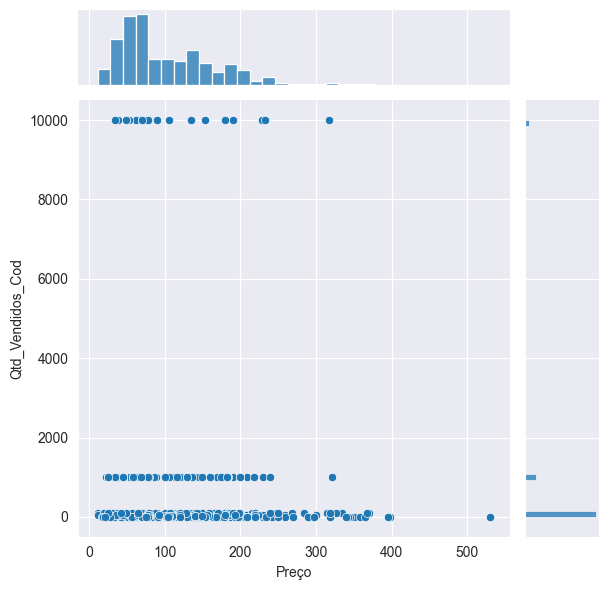

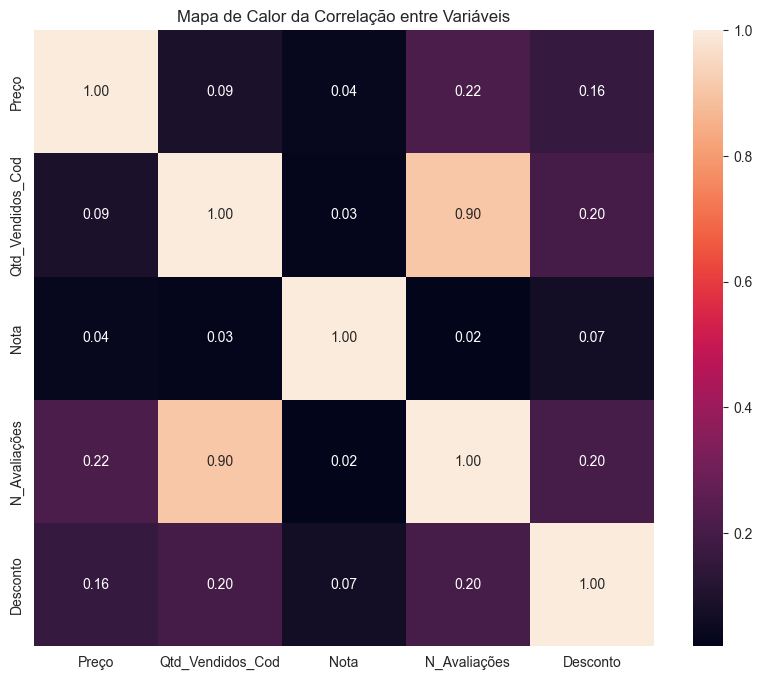

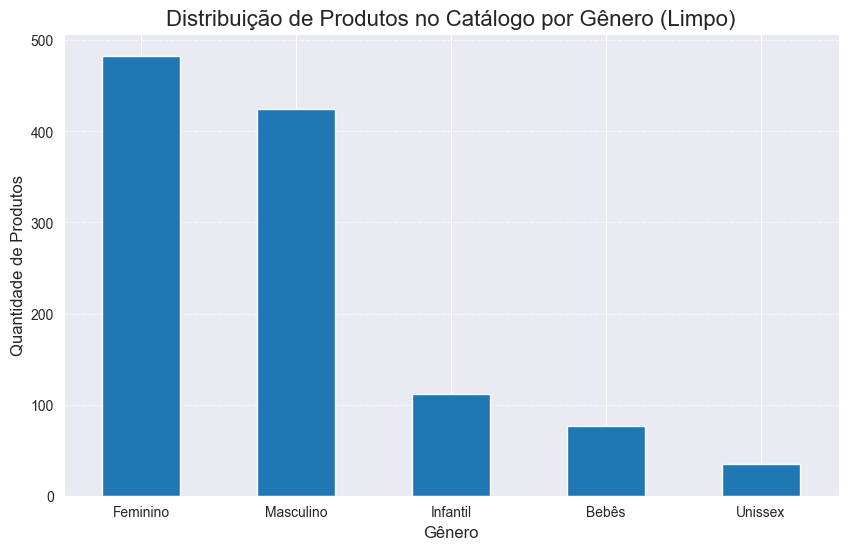

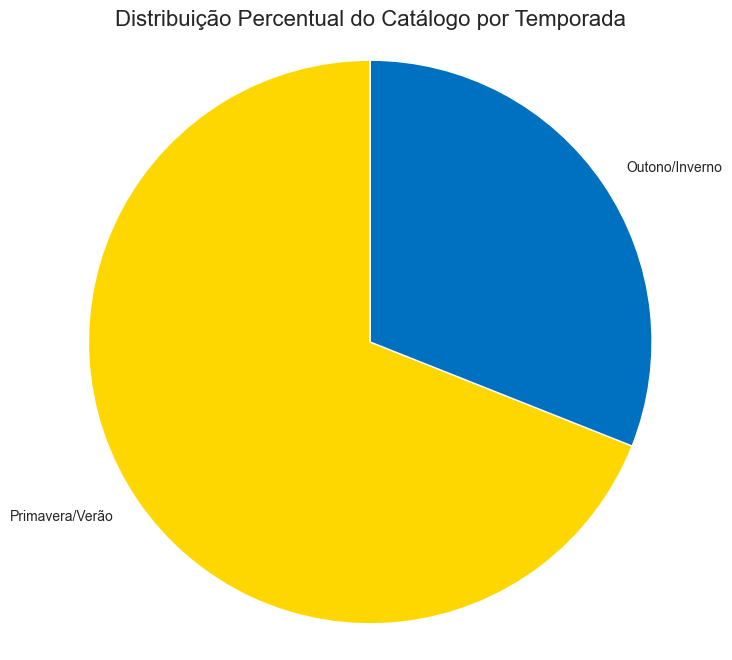

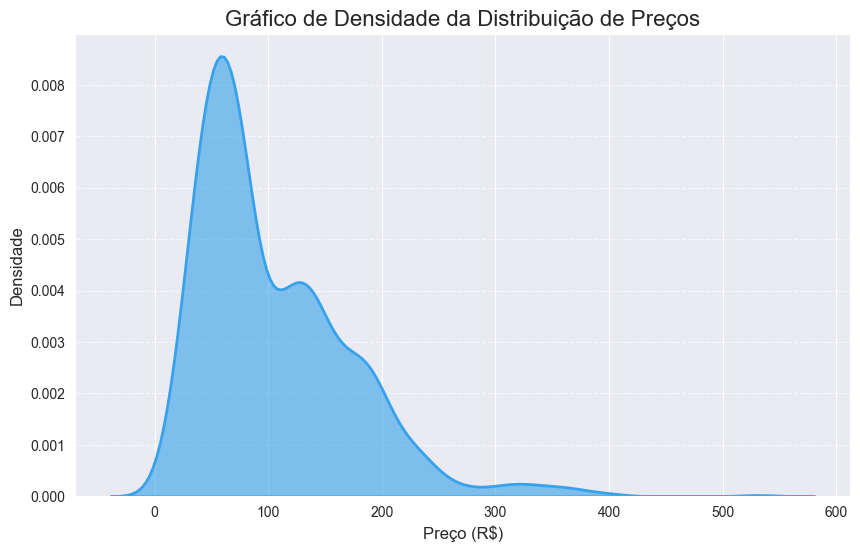

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura do arquivo
df = pd.read_csv('ecommerce_preparados.csv')  # lendo o arquivo CSV

# Limpeza inicial de colunas

review_cols = [col for col in df.columns if col.lower().startswith("review")]   #remover todas as colunas 'Review' pois não serão usadas
df.drop(columns=review_cols, inplace=True, errors='ignore')  # removendo colunas irrelevantes


# Tratamento da coluna Temporada

df['Temporada'] = df['Temporada'].replace('não definido', pd.NA) #tudo que é não definido vira Na

df = df.dropna(subset=['Temporada']) # removo linhas onde temporada ficou vazia

# Tratamento da coluna Desconto

df['Desconto'] = df['Desconto'].fillna(0) # descontos nulos viram 0 (produto sem desconto)

# Tratamento da coluna Gênero

df['Gênero'] = df['Gênero'].replace('não definido', pd.NA) # trocando "não definido" por NA

df = df.dropna(subset=['Gênero']) # removendo linhas sem gênero


# Função para mapear o gênero para grupos consolidados
def map_genero_detalhado(genero): # se for nulo, já cai em "Unissex"
    if pd.isna(genero):
        return 'Unissex'

    genero_lower = genero.lower()

    # vou agrupando por padrões mais comuns
    if 'bebê' in genero_lower:
        return 'Bebês'
    elif 'feminino' in genero_lower:
        return 'Feminino'
    elif 'masculino' in genero_lower:
        return 'Masculino'
    elif 'infantil' in genero_lower or 'menina' in genero_lower or 'menino' in genero_lower:
        return 'Infantil'
    else:
        return 'Unissex'

#Mapeando a nova coluna tratada
df['Gênero_Detalhado'] = df['Gênero'].apply(map_genero_detalhado)


# Função para agrupar temporadas em 2 grandes grupos
def agrupar_temporada(temporada):
    if pd.isna(temporada):
        return 'Outra'

    temp = temporada.lower()

    # agrupando conforme estação
    if 'primavera' in temp or 'verão' in temp:
        return 'Primavera/Verão'
    elif 'outono' in temp or 'inverno' in temp:
        return 'Outono/Inverno'
    else:
        return 'Outra'  # valores sem definição específica

# criando a coluna de agrupamento
df['Temporada_Agrupada'] = df['Temporada'].apply(agrupar_temporada)

# filtrando somente categorias válidas
df_filtrado = df[df['Temporada_Agrupada'] != 'Outra'].copy()


# print dos tratamentos realizados
print("Contagem das Novas Categorias de Temporada:")
print(df['Temporada_Agrupada'].value_counts())
print('\nQuantidade de nulos após limpeza:')
print(df.isna().sum())
print('\nDimensão final do dataset:', df.shape)
print('\nPrimeiras linhas:')
print(df.head().to_string())



# Gráfico de Dispersão
sns.jointplot(x='Preço', y='Qtd_Vendidos_Cod', data=df, kind='scatter')
plt.show()


# Mapa de Calor das Correlações
df_corr = df[['Preço', 'Qtd_Vendidos_Cod', 'Nota', 'N_Avaliações', 'Desconto']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, fmt=".2f")
plt.title('Mapa de Calor da Correlação entre Variáveis')
plt.show()


# Gráfico de Barras
plt.figure(figsize=(10, 6))
df['Gênero_Detalhado'].value_counts().plot(kind='bar', color='#1f77b4')

plt.title('Distribuição de Produtos no Catálogo por Gênero (Limpo)', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Quantidade de Produtos', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



# Gráfico de Pizza )
contagem_temporada = df_filtrado['Temporada_Agrupada'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(contagem_temporada.values, labels=contagem_temporada.index, colors=['#FFD700', '#0070c0'], startangle=90)
plt.title('Distribuição Percentual do Catálogo por Temporada', fontsize=16)
plt.axis('equal')
plt.show()



# Gráfico de Densidade
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Preço',fill=True, alpha=0.6, linewidth=2, color='#36a2eb')

plt.title('Gráfico de Densidade da Distribuição de Preços', fontsize=16)
plt.xlabel('Preço (R$)', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
